In [ ]:
!pip3 install pixellib --upgrade

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation

In [ ]:
!wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.3/deeplabv3_xception65_ade20k.h5

In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-image

In [ ]:
segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")
a, b = segment_image.segmentAsAde20k("/interior.jpeg", output_image_name="OUTPUT.jpg")

In [ ]:
image = cv2.cvtColor(cv2.imread('/interior.jpeg'), cv2.COLOR_BGR2RGB)

In [ ]:
#print(image)
plt.imshow(image.astype(np.uint8))
plt.axis('off')
plt.show()

In [ ]:
image2 = cv2.cvtColor(cv2.imread('OUTPUT.jpg'), cv2.COLOR_BGR2RGB)

In [ ]:
print(image2)

In [ ]:
segmentation_mask = b

# Extract the binary mask for the desired class index
class_index = 0  # Example: Extract masks for class index 0 (wall)
binary_mask = np.all(segmentation_mask == a['class_colors'][class_index], axis=-1).astype(np.uint8)

# Create a copy of the original image
new_image = image.copy()

# Apply the binary mask to the new image
new_image[binary_mask == 1] = 000

# Show the resulting image
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()


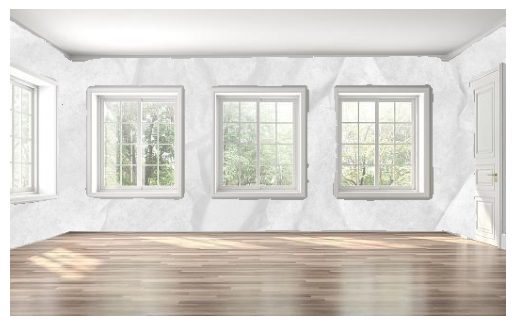

In [ ]:
segmentation_mask = b

# Extract the binary mask for the desired class index
class_index = 0  # Example: Extract masks for class index 0 (wall)
binary_mask = np.all(segmentation_mask == a['class_colors'][class_index], axis=-1).astype(np.uint8)

# Create a copy of the original image
new_image = image.copy()

replacement_image_path = '/crumpled-white-paperboard_95678-119.jpg'

# Load the replacement image
replacement_image = cv2.imread(replacement_image_path)
replacement_image = cv2.cvtColor(replacement_image, cv2.COLOR_BGR2RGB)

# Resize the replacement image to match the dimensions of the binary_mask
replacement_image_resized = cv2.resize(replacement_image, (binary_mask.shape[1], binary_mask.shape[0]))

# Replace the wall pixels with the resized replacement image
new_image[np.where(binary_mask)] = replacement_image_resized[np.where(binary_mask)]

# Display the resulting image
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [ ]:
print(new_image)

In [ ]:
print ("values in a: ", a)
print ("values in b: ", b)

In [ ]:
print(segmentation_mask)

In [ ]:
class_ids = np.array(a['class_ids'])
if 1 in class_ids:
    wall_index = np.where(class_ids == 1)[0][0]
    print(wall_index)
    # Extract the segmentation mask for the wall class
    wall_mask = np.array(b[:, :, wall_index])

    # Create a binary mask for the wall class
    binary_wall_mask = wall_mask.astype(np.uint8) * 255

    # Create a PIL image from the binary wall mask
    wall_mask_image = Image.fromarray(binary_wall_mask)

    # Save the wall mask image
    wall_mask_image.save("wall_mask.jpg")

    # Apply the wall mask to the original input image
    input_image = Image.open(input_image_path)
    wall_segmented_image = Image.composite(input_image, Image.new('RGB', input_image.size), wall_mask_image)
    wall_segmented_image.save("wall_segmented_image.jpg")
else:
    print("Wall class not found in the segmentation result.")


In [ ]:
plt.imshow(Image.open("wall_segmented_image.jpg"))

In [ ]:
segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

print(a)
print(b)
target_index = a['class_ids'].index(1)
modified_color = np.array([255, 255, 255])
a['class_colors'][target_index] = modified_color
print(a)
wall_mask = a['masks'][target_index]

# Convert the wall mask to the same size as the segmented array
resized_wall_mask = np.array(Image.fromarray(wall_mask.astype(np.uint8)).resize((segmented_array.shape[1], segmented_array.shape[0])))

# Create a mask for the wall pixels
wall_pixels_mask = np.all(resized_wall_mask, axis=-1)

# Update the color values for the wall pixels in the segmented array
segmented_array[wall_pixels_mask] = modified_color

# Convert the updated segmented array to RGB mode
updated_segmented_array_rgb = cv2.cvtColor(segmented_array, cv2.COLOR_BGR2RGB)

# Create a PIL image from the updated segmented array
updated_segmented_image = Image.fromarray(updated_segmented_array_rgb)

# Save the updated segmented image
updated_segmented_image.save("updated_OUTPUT.jpg")

# Display the updated segmented image
plt.imshow(updated_segmented_image)
plt.axis('off')
plt.show()


In [ ]:
 # Load the updated segmented image
updated_segmented_image = Image.open("updated_OUTPUT.jpg")

# Convert the updated segmented image to an array
updated_segmented_array = np.array(updated_segmented_image)

# Get the class names and colors
class_names = a['class_names']
class_colors = a['class_colors']

# Iterate over the class IDs and print the corresponding class name and color
for class_id in a['class_ids']:
    index = a['class_ids'].index(class_id)
    class_name = class_names[index]
    class_color = class_colors[index]
    class_color_str = ' '.join(str(c) for c in class_color)
    print(f"Class ID: {class_id} | Class Name: {class_name} | Class Color: {class_color_str}")


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
plt.imshow(Image.open("OUTPUT.jpg"))


In [ ]:
plt.imshow(Image.open("updated_OUTPUT.jpg"))

In [ ]:
from PIL import Image

# Open the original segmented image
output_image = Image.open("OUTPUT.jpg")

# Convert the original segmented image to an array
output_array = np.array(output_image)
print("OUTPUT.jpg array:")
print(output_array)

# Open the updated segmented image
updated_output_image = Image.open("updated_OUTPUT.jpg")

# Convert the updated segmented image to an array
updated_output_array = np.array(updated_output_image)
print("updated_OUTPUT.jpg array:")
print(updated_output_array)
